In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [15]:
df = pd.read_csv('long_run_labelled.csv')
df_pca = df.drop(['Seconds', 'Timestamp_IST', 'label', 'State'], axis=1)
label = df['label']

In [4]:
pca_model = PCA()
pca_model.fit(df_pca)

pca_res = pca_model.transform(df_pca)
pca_model.n_components_


46

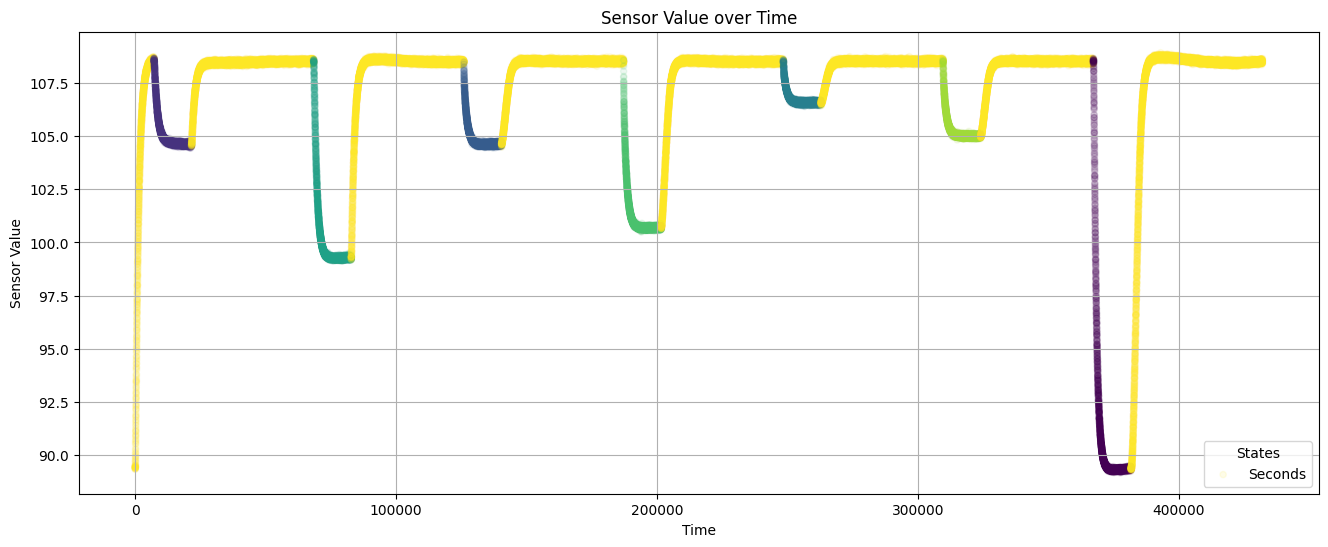

In [5]:
# plot a sensor value over time
plt.figure(figsize=(16,6))
plt.scatter(df['Seconds'][:], df['11-PT-1203'], s=20, alpha=0.1, c=df['State'].astype('category').cat.codes)
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.title('Sensor Value over Time')
plt.legend(df.groupby(df['State']).count(), title="States")
plt.grid()
plt.show()

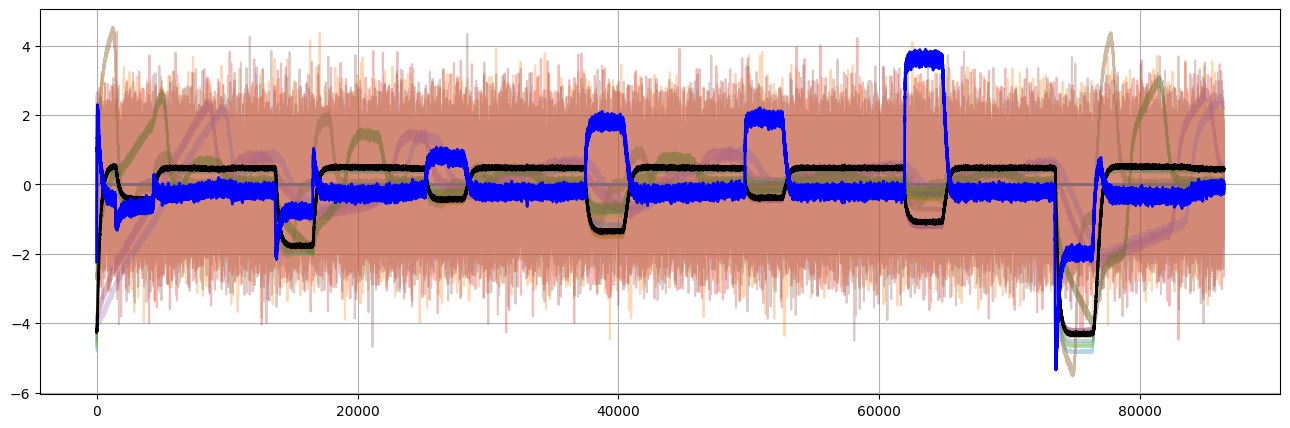

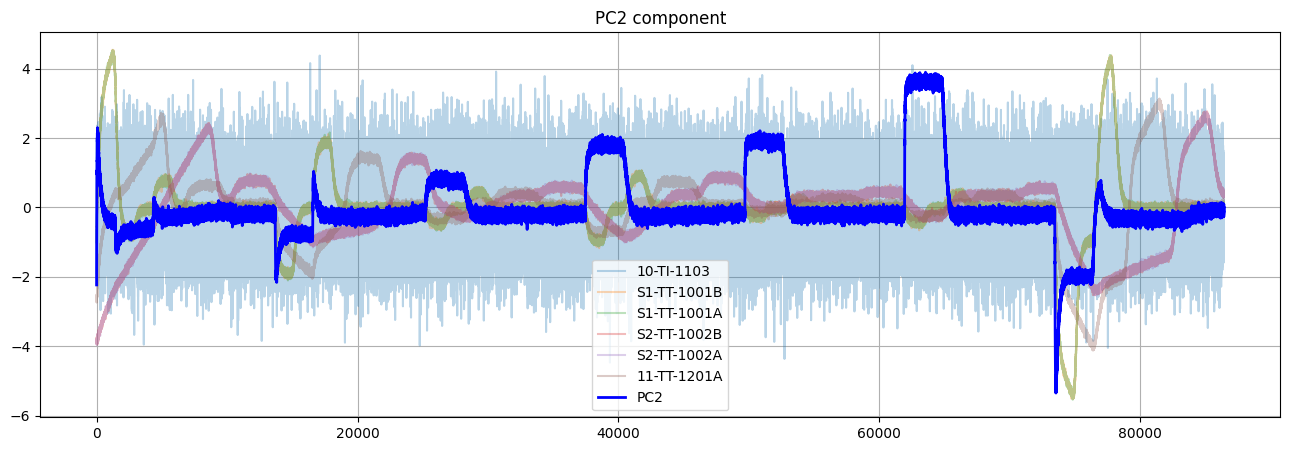

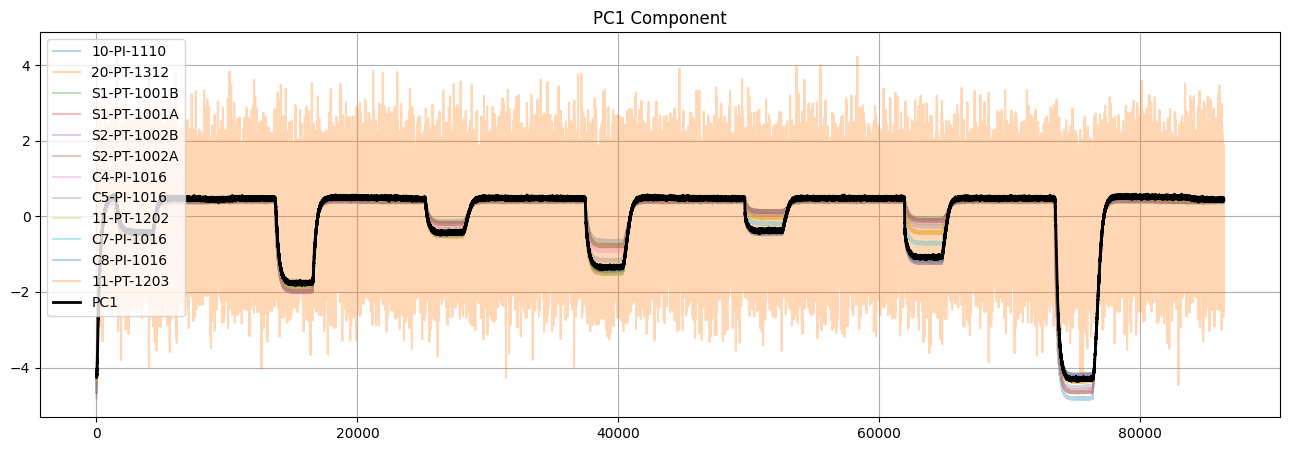

In [6]:
# plot scaled sensor readings vs pc'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
plt.figure(figsize=(16, 5))

for col in df.drop(['Seconds', 'Timestamp_IST', 'label', 'State'], axis=1).columns:
    scaler.fit_transform(df[col].values.reshape(-1, 1))
    plt.plot(scaler.transform(df[col].values.reshape(-1, 1)), label=col, alpha=0.31)

# plt.plot(scaler.fit_transform(pca_result_all[:, 1].reshape(-1, 1)), label='PC2', color='red', alpha=0.4)
plt.plot(scaler.fit_transform(pca_res[:, 0].reshape(-1, 1)), label='PC1', color='black', linewidth=2)
plt.plot(scaler.fit_transform(pca_res[:, 1].reshape(-1, 1)), label='PC2', color='blue', linewidth=2)
# plt.plot(scaler.fit_transform(pca_res[:, 2].reshape(-1, 1)), label='PC3', color='red', linewidth=2)

# plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 5))

for col in df.drop(['Seconds', 'Timestamp_IST', 'label', 'State'], axis=1).columns:
    if '-TI-' in col or '-TT-' in col :
        scaler.fit_transform(df[col].values.reshape(-1, 1))
        plt.plot(scaler.transform(df[col].values.reshape(-1, 1)), label=col, alpha=0.31)

# plt.plot(scaler.fit_transform(pca_result_all[:, 1].reshape(-1, 1)), label='PC2', color='red', alpha=0.4)
# plt.plot(scaler.fit_transform(pca_res[:, 0].reshape(-1, 1)), label='PC1', color='black', linewidth=2)
plt.plot(scaler.fit_transform(pca_res[:, 1].reshape(-1, 1)), label='PC2', color='blue', linewidth=2)
# plt.plot(scaler.fit_transform(pca_res[:, 2].reshape(-1, 1)), label='PC3', color='red', linewidth=2)

plt.legend()
plt.title('PC2 component')
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 5))

for col in df.drop(['Seconds', 'Timestamp_IST', 'label', 'State'], axis=1).columns:
    if '-PI-' in col or '-PT-' in col :
        scaler.fit_transform(df[col].values.reshape(-1, 1))
        plt.plot(scaler.transform(df[col].values.reshape(-1, 1)), label=col, alpha=0.31)

# plt.plot(scaler.fit_transform(pca_result_all[:, 1].reshape(-1, 1)), label='PC2', color='red', alpha=0.4)
plt.plot(scaler.fit_transform(pca_res[:, 0].reshape(-1, 1)), label='PC1', color='black', linewidth=2)
# plt.plot(scaler.fit_transform(pca_res[:, 1].reshape(-1, 1)), label='PC2', color='blue', linewidth=2)
# plt.plot(scaler.fit_transform(pca_res[:, 2].reshape(-1, 1)), label='PC3', color='red', linewidth=2)

plt.legend()
plt.title('PC1 Component')
plt.grid(True)
plt.show()




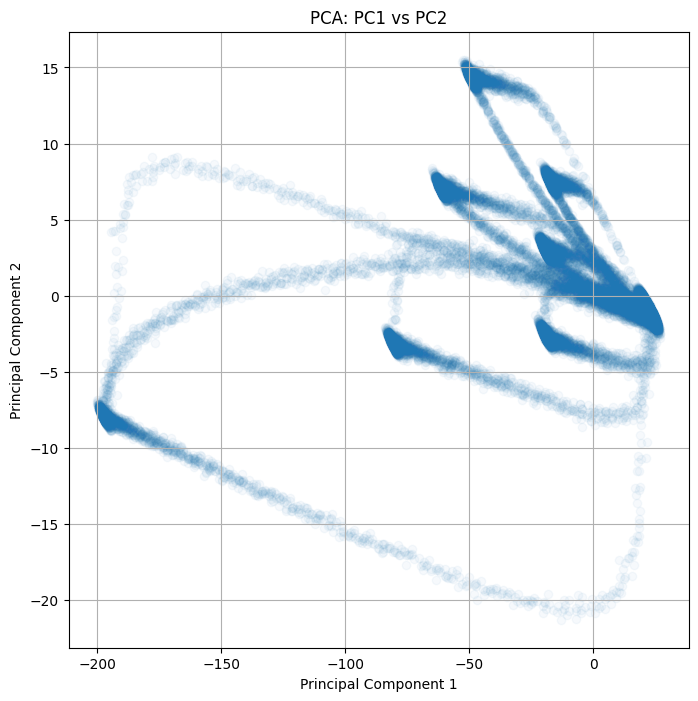

In [7]:
# plot pc1 vs pc2
plt.figure(figsize=(8, 8))
plt.scatter(pca_res[:, 0], pca_res[:, 1], alpha=0.04)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: PC1 vs PC2')
plt.grid(True)
plt.show()

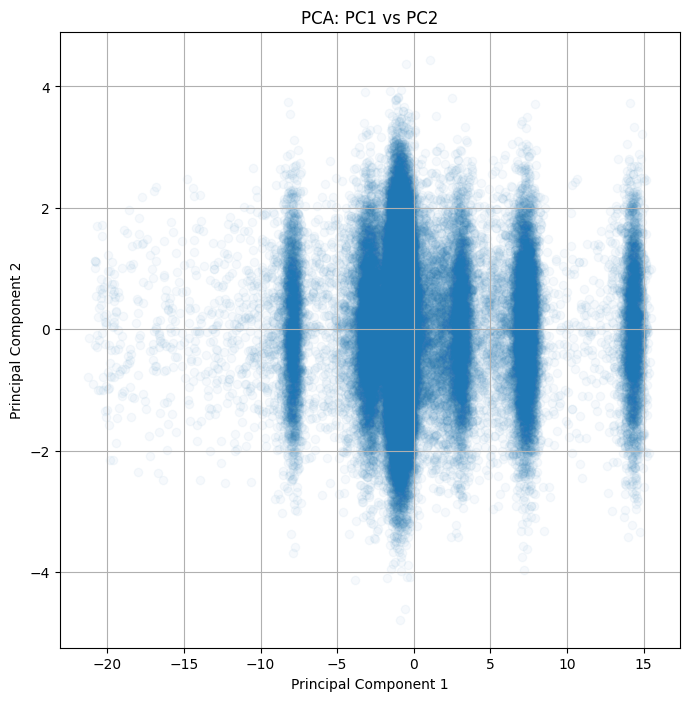

In [12]:
# plot pc1 vs pc2
plt.figure(figsize=(8, 8))
plt.scatter(pca_res[:, 1], pca_res[:, 2], alpha=0.04)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: PC1 vs PC2')
plt.grid(True)
plt.show()

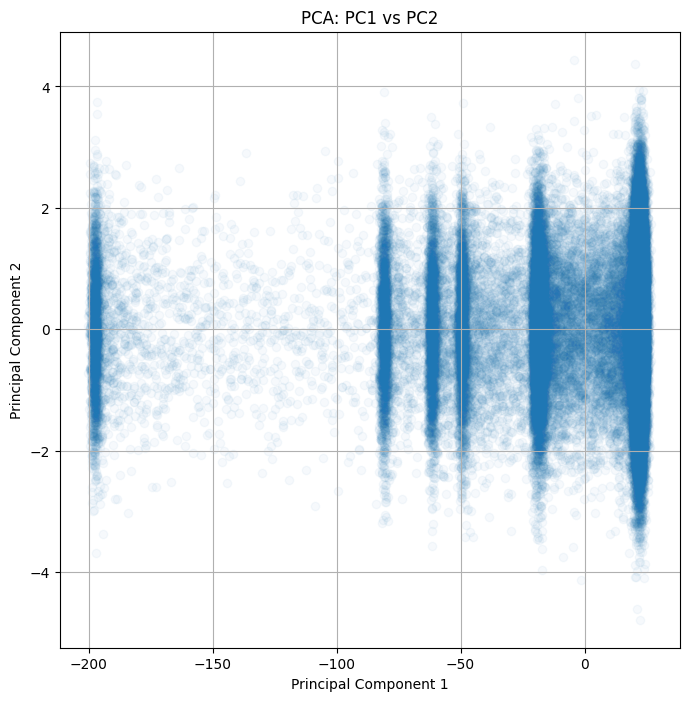

In [ ]:
# plot pc1 vs pc2   
plt.figure(figsize=(8, 8))
plt.scatter(pca_res[:, 0], pca_res[:, 2], alpha=0.04)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: PC1 vs PC2')
plt.grid(True)
plt.show()

In [20]:
pca_res_1 = pca_res[:, 0]
pca_res_2 = pca_res[:, 1]
pca_res_3 = pca_res[:, 2]

# write to csv along with labels
pca_df = pd.DataFrame({'pca_res_1': pca_res_1, 'pca_res_2': pca_res_2, 'pca_res_3': pca_res_3, 'label': label})
pca_df.to_csv('pca_output.csv', index=False)

In [21]:
import pandas as pd
import numpy as np

df = pd.read_csv("pca_output.csv")  # or same original df

print(df.head())
print(df.columns)


    pca_res_1  pca_res_2  pca_res_3     label
0 -194.561861  -8.873256  -2.714160  no_fault
1 -194.389428  -7.443243  -0.895245  no_fault
2 -194.273235  -7.040441   0.130187  no_fault
3 -195.658835  -6.176591   0.733644  no_fault
4 -194.539949  -6.406559   0.803089  no_fault
Index(['pca_res_1', 'pca_res_2', 'pca_res_3', 'label'], dtype='object')


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["label_encoded"] = le.fit_transform(df["label"])

X = df[["pca_res_1", "pca_res_2", "pca_res_3"]]
y = df["label_encoded"]

print("Classes:", le.classes_)


Classes: ['10pct0' '2pct0' '2pct130' '2pct250' '4pct0' '4pct130' '4pct250'
 'no_fault']


In [28]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [29]:
print("Train labels:", le.inverse_transform(np.unique(y_train)))
print("Test labels :", le.inverse_transform(np.unique(y_test)))


Train labels: ['10pct0' '2pct0' '2pct130' '2pct250' '4pct0' '4pct130' '4pct250'
 'no_fault']
Test labels : ['10pct0' '2pct0' '2pct130' '2pct250' '4pct0' '4pct130' '4pct250'
 'no_fault']


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression(
    max_iter=2000,
    n_jobs=-1,
    multi_class="auto"
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [31]:
test_labels = np.unique(y_test)

print(classification_report(
    y_test,
    y_pred,
    labels=test_labels,
    target_names=le.inverse_transform(test_labels)
))


              precision    recall  f1-score   support

      10pct0       0.98      0.99      0.99       576
       2pct0       0.97      0.75      0.85       576
     2pct130       0.00      0.00      0.00       576
     2pct250       0.96      1.00      0.98       576
       4pct0       0.95      0.98      0.97       576
     4pct130       0.84      0.93      0.88       576
     4pct250       0.98      0.99      0.98       576
    no_fault       0.95      0.98      0.96     13248

    accuracy                           0.94     17280
   macro avg       0.83      0.83      0.83     17280
weighted avg       0.91      0.94      0.93     17280



In [ ]:
import plotly.express as px

df_test = X_test.copy()
df_test["label"] = le.inverse_transform(y_test.values)
# add predicted labels
df_test["test_label"] = le.inverse_transform(y_pred)

fig = px.scatter_3d(
    df_test,
    x="pca_res_1",
    y="pca_res_2",
    z="pca_res_3",
    color="test_label",
    opacity=0.3,
    title="3D PCA – Fault Classification (Test Set)"
)

fig.update_layout(
    legend_title_text="Fault Type",
    scene=dict(
        xaxis_title="PC1",
        yaxis_title="PC2",
        zaxis_title="PC3"
    )
)

fig.upda

fig.write_html("pca_3d_faults_pred.html")
fig.show()


# plot wrogly classified points in 3d PCA
wrongly_classified = df_test[df_test["label"] != df_test["test_label"]]
fig_wrong = px.scatter_3d(
    wrongly_classified,
    x="pca_res_1",
    y="pca_res_2",
    z="pca_res_3",
    color="test_label",
    opacity=0.7,
    title="3D PCA – Wrongly Classified Points"
)

fig_wrong.update_layout(
    legend_title_text="Fault Type",
    scene=dict(
        xaxis_title="PC1",
        yaxis_title="PC2",
        zaxis_title="PC3"
    )
)
fig_wrong.write_html("pca_3d_wrongly_classified.html")
fig_wrong.show()